In [133]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pmdarima.arima import auto_arima
from datetime import datetime
import matplotlib.pyplot as plt
import tsfresh
from pmdarima.arima import ADFTest
from tsfresh import extract_features
from statsmodels.tsa.arima.model import ARIMA

In [134]:
values = read_csv("../../Electric_Production.csv")

In [135]:
values = read_csv("../../../daily-minimum-temperatures-in-me.csv")

In [136]:
values.head(13)

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
5,1/6/1981,15.8
6,1/7/1981,15.8
7,1/8/1981,17.4
8,1/9/1981,21.8
9,1/10/1981,20


In [137]:

values = values.rename(columns={values.columns[1]: 'Data'})
values = values.rename(columns={values.columns[0]: 'Time'})
values['Time'] = pd.to_datetime(
    values['Time'], errors='coerce')

In [138]:
freq = pd.infer_freq(values["Time"])

In [139]:
# end_date = pd.to_datetime(x) + pd.DateOffset(months=10)
# print(end_date)

In [140]:
values.set_index('Time', inplace=True)

In [141]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(
    values, test_size=0.2, shuffle=False)

In [150]:
model = ARIMA( train, exog=None, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), 
              trend='n', enforce_stationarity=False, enforce_invertibility=True, 
              concentrate_scale=False, trend_offset=1, dates=None, freq=None, 
              missing='none', validate_specification=False)
model_fit = model.fit() 
model_fit.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereData    object
dtype: object and None. The data was
            Data
Time            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
...          ...
1988-12-26   9.5
1988-12-27  12.9
1988-12-28  12.9
1988-12-29  14.8
1988-12-30  14.1

[2920 rows x 1 columns]
and
 [[1.000e+00]
 [2.000e+00]
 [3.000e+00]
 ...
 [2.918e+03]
 [2.919e+03]
 [2.920e+03]]
before. After,
[['20.7']
 ['17.9']
 ['18.8']
 ...
 ['12.9']
 ['14.8']
 ['14.1']]
[[1.000e+00]
 [2.000e+00]
 [3.000e+00]
 ...
 [2.918e+03]
 [2.919e+03]
 [2.920e+03]].

In [ ]:
train.tail(2)

,Data
Time,
2011-04-01,89.3583
2011-05-01,90.0698


In [ ]:
x = values.index[train.shape[0]]
print(x)

2011-06-01 00:00:00


In [ ]:
n_periods = test.shape[0] + 12

In [ ]:
index_future_dates = pd.date_range(
    start=x, periods=n_periods, freq=freq)

index_future_dates

DatetimeIndex(['2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01',
               '2011-10-01', '2011-11-01', '2011-12-01', '2012-01-01',
               '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01',
               '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01',
               '2012-10-01', '2012-11-01', '2012-12-01', '2013-01-01',
               '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01',
               '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01',
               '2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01',
               '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01',
               '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01',
               '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01',
               '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
               '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
               '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
      

In [ ]:
predicted = model_fit.forecast(n_periods)

In [ ]:
prediction = pd.DataFrame(predicted, index=index_future_dates)
prediction.columns = ['predicted_values']
prediction.reset_index(inplace=True)

In [ ]:
prediction=prediction.tail(12)
print(prediction)

        index  predicted_values
80 2018-02-01        114.316008
81 2018-03-01        105.800268
82 2018-04-01         95.679637
83 2018-05-01         97.063240
84 2018-06-01        108.328439
85 2018-07-01        116.203885
86 2018-08-01        117.052550
87 2018-09-01        105.606687
88 2018-10-01         97.664913
89 2018-11-01         99.776113
90 2018-12-01        117.493545
91 2019-01-01        124.109432


In [ ]:
prediction.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['index', 'predicted_values'], dtype='object')>

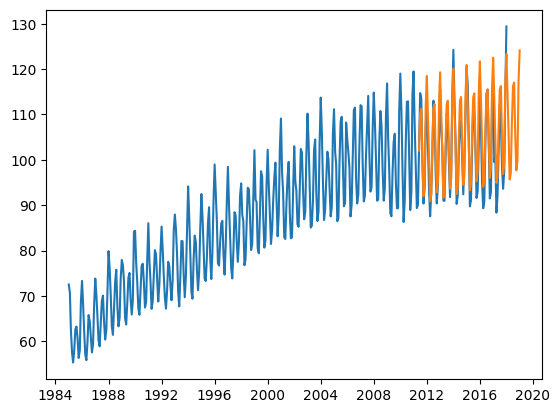

In [ ]:
plt.plot(values.index,values['Data'])
plt.plot(index_future_dates,predicted)